In [2]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import math

In [ ]:
def diagonalized(Q, t):
  (eigenvalues, S) = np.linalg.eig(Q)
  D = np.identity(len(eigenvalues))
  for i in range(len(eigenvalues)):
    D[i,i] = eigenvalues[i]
  P = np.matmul(S, expm(t*D))
  P = np.matmul(P, np.linalg.inv(S))
  return P

In [7]:
## Loop de simulação usando Q. A princípio ignorar
def simulate(Q, max_t, n, t=1, infected=1, history=[]):
  history.append(infected)
  if t>=max_t:
    return history
  P = expm(t*Q)
  new_infected = np.random.choice(range(n), p=P[infected,:])
  return simulate(Q, max_t, n, t+1, new_infected, history)

$\beta =infection\ rate, \gamma =recovery\ rate, N=total\ population$

$b(j)=\frac{\beta i(N-i)}{N}$

$d(j)=\gamma i$

$
  Q_{i,j} = 
     \begin{cases}
      0,\text{ if }i=0 \\
      b(i),\text{ if }j=i+1 \\
      d(i),\text{ if }j=i-1 \\
      1-(b(i)+d(i)),\text{ if }j=i
     \end{cases}
$

Falta o $\varepsilon=$taxa de infecção exógena? Professor disse que não pode ser 0 para a cadeia ser ergódica...

In [90]:
beta = 0.5
gama = 0.1
epsilon = 0.01 #Usar epsilon ou não??
n = 500
max_t = 50

Q = np.zeros((n, n))

for i in range(1, n):
  for j in range(n):
    b = beta*i*(n-i)/n
    d = gama*i
    if j==i-1:
      Q[i,j]=d
    elif j==i+1:
      Q[i,j]=b

for i in range(1, n):
  Q[i,i] = -sum(Q[i,:])

$P(t) = e^{tQ}$

A função de transição $P(t)$ é usada para calcular o valor esperado de $X_t$.

$E(X_t|X_{t-1}=i) = \sum_{j=1}^{n}{j*P(X_t=j|X_{t-1}=i)}$

[1, 1.4894821216727314, 2.2152402098982753, 6.537375914201826, 27.83645781317352, 138.24271818812264, 340.5702024842525, 395.49810563167216, 399.56111563474036, 399.7350931790427, 399.7397220803758, 399.74280696841606, 399.74486803728354, 399.7462474344585, 399.74717168795445, 399.7477914642391, 399.7482072887041, 399.7484863769558, 399.7486737376215, 399.74879953931935, 399.74888401710535, 399.7489407494442, 399.7489788508956, 399.749004440732, 399.74902162768706, 399.74903317142946, 399.74904092470365, 399.74904613231894, 399.7490496300444, 399.749051979373, 399.7490535573867, 399.74905461726814, 399.74905532906166, 399.7490558071996, 399.74905612844407, 399.7490563441046, 399.74905648906037, 399.7490565863215, 399.7490566517446, 399.74905669568716, 399.74905672510624, 399.7490567447915, 399.74905675811556, 399.7490567670336, 399.7490567730733, 399.7490567772327, 399.74905677993775, 399.7490567817035, 399.7490567827857, 399.74905678374057]


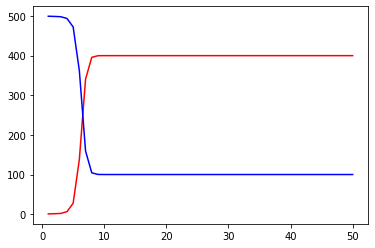

In [108]:
def meanLoop(Q, max_t, n, t=1, infected=1, history=[], times=[]):
  history.append(infected)
  times.append(t)
  if t>=max_t:
    return (history, times)
  # P(t) = e^{tQ}
  # A função de transição P(t) é usada para calcular o valor esperado de X_t
  P = expm(t*Q)

  # E(X_t|X_{t-1}=i) = sum{ j*P(X_t=j|X_{t-1}=i) }
  # Aqui, arrendondamos para baixo o número atual de infectados (i) porque não existe uma pessoal parcialmente infectada
  terms = [j * P[math.floor(infected),j] for j in range(n)]
  expected_value = sum(terms)
  # Usamos o valor esperado calculado para calcular para t+1
  return meanLoop(Q, max_t, n, t+1, expected_value, history, times)

(history, times) = meanLoop(Q, max_t, n, t=1, infected=1, history=[])

print(history)
susceptible=[n-i for i in history]

plt.plot(times, history, 'r')
plt.plot(times, susceptible, 'b')
plt.show()

[1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


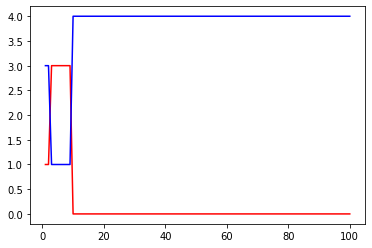

In [55]:
history=simulate(Q, max_t, n, t=1, infected=1, history=[])
print(history)
susceptible=[n-i for i in history]

plt.plot(range(1,max_t+1), history, 'r')
plt.plot(range(1,max_t+1), susceptible, 'b')
plt.show()